In [3]:
import os
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [4]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset Loading : images and masks

In [5]:
def load_dataset(path):
  images=sorted(glob(os.path.join(path,'images','*')))
  masks=sorted(glob(os.path.join(path,'masks','*')))
  return images,masks

Loading dataset

In [6]:
dataset_path="/content/drive/MyDrive/Dataset"


In [7]:
images,masks=load_dataset(dataset_path)
print(f"Images:{len(images)}, Masks:{len(masks)}")

Images:100, Masks:100


In [8]:
for x,y in zip(images,masks):
  print(x,y)

/content/drive/MyDrive/Dataset/images/1.png /content/drive/MyDrive/Dataset/masks/1.png
/content/drive/MyDrive/Dataset/images/10.png /content/drive/MyDrive/Dataset/masks/10.png
/content/drive/MyDrive/Dataset/images/101.png /content/drive/MyDrive/Dataset/masks/101.png
/content/drive/MyDrive/Dataset/images/103.png /content/drive/MyDrive/Dataset/masks/103.png
/content/drive/MyDrive/Dataset/images/105.png /content/drive/MyDrive/Dataset/masks/105.png
/content/drive/MyDrive/Dataset/images/106.png /content/drive/MyDrive/Dataset/masks/106.png
/content/drive/MyDrive/Dataset/images/108.png /content/drive/MyDrive/Dataset/masks/108.png
/content/drive/MyDrive/Dataset/images/11.png /content/drive/MyDrive/Dataset/masks/11.png
/content/drive/MyDrive/Dataset/images/111.png /content/drive/MyDrive/Dataset/masks/111.png
/content/drive/MyDrive/Dataset/images/112.png /content/drive/MyDrive/Dataset/masks/112.png
/content/drive/MyDrive/Dataset/images/113.png /content/drive/MyDrive/Dataset/masks/113.png
/conten

Visualize the dataset

In [9]:
pip install imshowtools


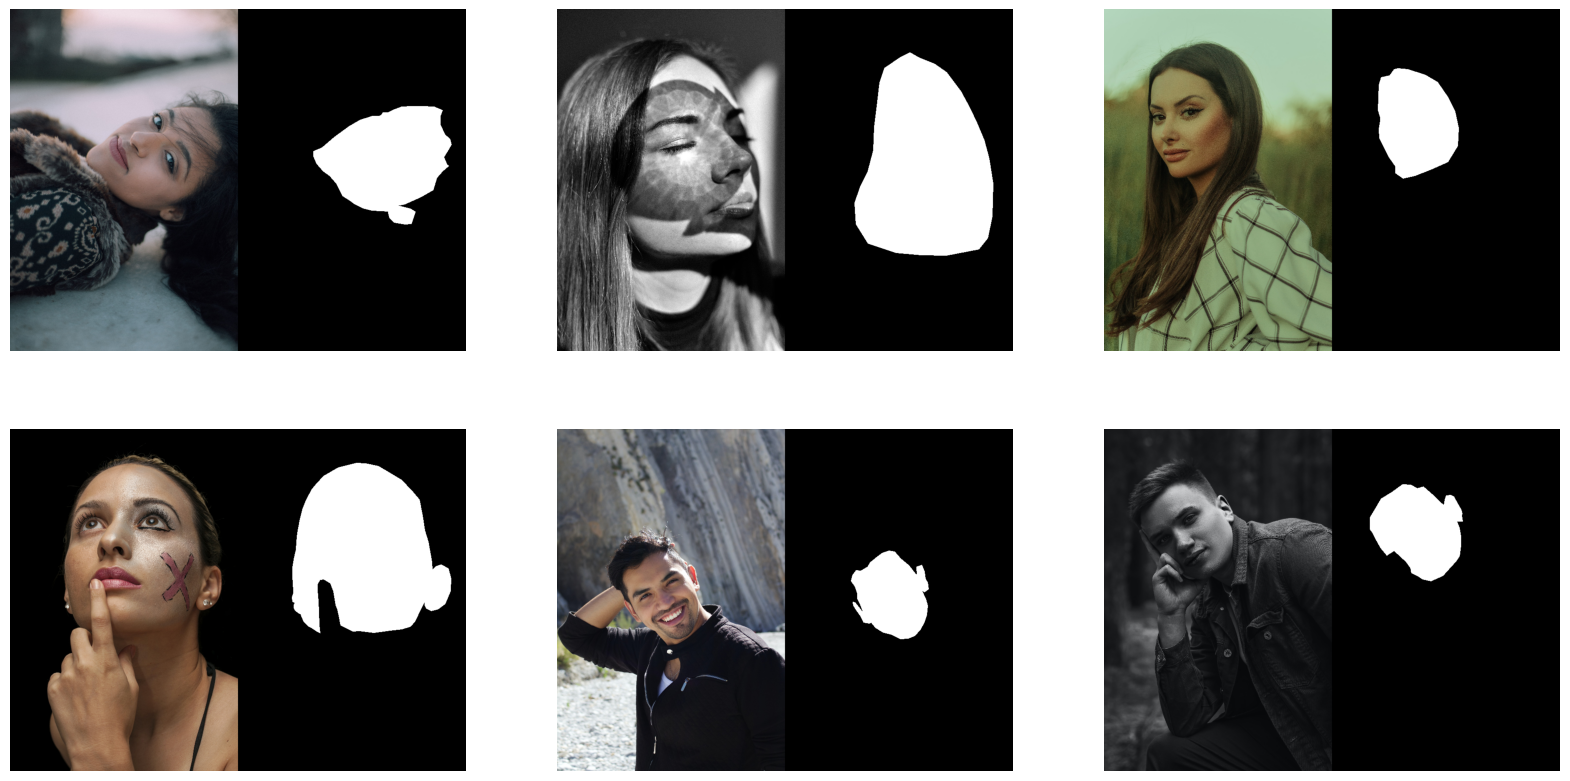

In [10]:
from imshowtools import imshow

cat=[]
for x,y in zip(images[ :6],masks[ :6]):
  x=cv2.imread(x,cv2.IMREAD_COLOR)
  x=cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
  y=cv2.imread(y,cv2.IMREAD_COLOR)
  z=np.concatenate([x,y],axis=1)
  cat.append(z)

imshow(*cat,size=(20,10),columns=3)


Dataset Split

In [11]:
def split_dataset(images, masks, split=0.2):
  split_value=int(len(images)*split)

  train_x,valid_x=train_test_split(images,test_size=split_value,random_state=42)
  train_y,valid_y=train_test_split(masks,test_size=split_value,random_state=42)

  train_x,test_x=train_test_split(train_x,test_size=split_value,random_state=42)
  train_y,test_y=train_test_split(train_y,test_size=split_value,random_state=42)

  return (train_x,train_y),(valid_x,valid_y),(test_x,test_y)

In [12]:
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)=split_dataset(images, masks, split=0.2)

In [13]:
print(f"train_x: {len(train_x)}, train_y: {len(train_y)}\n valid_x: {len(valid_x)}, valid_y: {len(valid_y)} \n test_x: {len(test_x)}, test_y: {len(test_y)} ")

train_x: 60, train_y: 60
 valid_x: 20, valid_y: 20 
 test_x: 20, test_y: 20 


Saving the dataset

In [14]:
def create_dir(path):
  if not os.path.exists(path):
    os.makedirs(path)

To extract 1.png

In [ ]:
# s=/content/drive/MyDrive/Dataset/masks/1.png

In [ ]:
# name=s.split("/")[-1]
# print(name)

Data Augmentation

In [15]:
!pip install albumentations


In [16]:
from albumentations import HorizontalFlip, CoarseDropout,RandomBrightness,RandomContrast

In [17]:
save_dir=os.path.join("Aug_Dataset","aug")
for item in ["train","valid","test"]:
  create_dir(os.path.join(save_dir,item,"images"))
  create_dir(os.path.join(save_dir,item,"masks"))

In [18]:
def save_aug_dataset(images,masks,save_dir,augment=False):
  for x,y in tqdm(zip(images,masks),total=len(images)):
    name=x.split("/")[-1]
    x=cv2.imread(x,cv2.IMREAD_COLOR)
    y=cv2.imread(y,cv2.IMREAD_COLOR)

    if augment==True:
      aug=HorizontalFlip(p=1)
      augmented=aug(image=x,mask=y)
      x1=augmented["image"]
      y1=augmented["mask"]

      aug=CoarseDropout(p=1,max_holes=10,max_height=32,max_width=32)
      augmented=aug(image=x,mask=y)
      x2=augmented["image"]
      y2=augmented["mask"]

      aug=RandomBrightness(p=1.0)
      augmented=aug(image=x,mask=y)
      x3=augmented["image"]
      y3=augmented["mask"]

      aug=RandomContrast(p=1.0)
      augmented=aug(image=x,mask=y)
      x4=augmented["image"]
      y4=augmented["mask"]

      aug_x=[x,x1,x2,x3,x4]
      aug_y=[y,y1,y2,y3,y4]

    else:
      aug_x=[x]
      aug_y=[y]

    idx=0
    for ax,ay in zip(aug_x,aug_y):
      aug_name=f"{name}_{idx}.png"

      save_image_path=os.path.join(save_dir,"images",aug_name)
      save_mask_path=os.path.join(save_dir,"masks",aug_name)

      cv2.imwrite(save_image_path,ax)
      cv2.imwrite(save_mask_path,ay)

      idx+=1



In [19]:
save_aug_dataset(train_x,train_y,os.path.join(save_dir,"train"),augment=True)

  0%|          | 0/60 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/transforms.py:1258: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/transforms.py:1284: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
100%|██████████| 60/60 [00:50<00:00,  1.20it/s]


In [20]:
save_aug_dataset(valid_x,valid_y,os.path.join(save_dir,'valid'),augment=False)

100%|██████████| 20/20 [00:12<00:00,  1.63it/s]


In [21]:
save_aug_dataset(test_x,test_y,os.path.join(save_dir,'test'),augment=False)

100%|██████████| 20/20 [00:10<00:00,  1.94it/s]


# **IMPLEMENTING ATTENTION MECHANISM**

CBAM - Convulutional Block Attention Module

In [22]:
import tensorflow as tf

In [23]:
from tensorflow.keras.layers import Conv2D,BatchNormalization,Activation, MaxPool2D,Conv2DTranspose,Concatenate,Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau,CSVLogger
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D,Reshape,Dense,Multiply

Channel attention Module

In [24]:
def channel_attention_module(x,ratio=8):
  channel=x.shape[-1]

  l1=Dense(channel//ratio,activation="relu",use_bias=False)
  l2=Dense(channel,use_bias=False)

  x1=GlobalAveragePooling2D()(x)
  x1=l1(x1)
  x1=l2(x1)

  x2=GlobalAveragePooling2D()(x)
  x2=l1(x2)
  x2=l2(x2)

  feats=x1+x2
  feats=Activation("sigmoid")(feats)

  feats=Multiply()([x,feats])
  return feats



In [25]:
x=Input((128,128,64))
y=channel_attention_module(x)
print(y.shape)


(None, 128, 128, 64)


Spatial Attention Module

In [26]:
def spatial_attention_module(x):
  x1=tf.reduce_mean(x,axis=-1)
  x1=tf.expand_dims(x1,axis=-1)

  x2=tf.reduce_mean(x,axis=-1)
  x2=tf.expand_dims(x2,axis=-1)

  feats=Concatenate()([x1,x2])
  feats=Conv2D(1,kernel_size=7,padding="same",activation="sigmoid")(feats)

  feats=Multiply()([x,feats])
  return feats



In [27]:
x=Input((128,128,64))
y=spatial_attention_module(x)
print(y.shape)

(None, 128, 128, 64)


Convolutional Block Attention Module

In [28]:
def cbam(x):
  x=channel_attention_module(x)
  x=spatial_attention_module(x)
  return x



In [29]:
x=Input((128,128,64))
y=cbam(x)
print(y.shape)

(None, 128, 128, 64)


Training the UNet

Seeding

In [30]:
os.environ['PYTHONHASHSEED']=str(42)
np.random.seed(42)
tf.random.set_seed(42)

Hyperparameters

In [31]:
batch_size=4
lr=1e-4 #0.0001
epochs=100
height=768
width=512

Path

Creating Folder

In [32]:
def create_dir(path):
  if not os.path.exists(path):
    os.makedirs(path)

Building UNET

In [34]:
def conv_block(inputs,num_filters):
  x=Conv2D(num_filters,3,padding="same")(inputs)
  x=BatchNormalization()(x)
  x=Activation("relu")(x)

  x=Conv2D(num_filters,3,padding="same")(x)
  x=BatchNormalization()(x)
  x=Activation("relu")(x)

  x=cbam(x)

  return x

Encoder Block

In [35]:
def encoder_block(inputs, num_filters):
    x = conv_block(inputs, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

Decoder Block

In [36]:
def decoder_block(inputs,skip,num_filters):
  x=Conv2DTranspose(num_filters,(2,2),strides=2,padding="same")(inputs)
  x=Concatenate()([x,skip])
  x=conv_block(x,num_filters)
  return x


UNET

In [53]:
def build_unet(input_shape):
    """ Inputs """
    inputs = Input(input_shape)

    """ ResNet50 Encoder """
    resnet50 = ResNet50(include_top=False, weights="imagenet", input_tensor=inputs)

    s1 = resnet50.get_layer("input_7").output
    s2 = resnet50.get_layer("conv1_relu").output
    s3 = resnet50.get_layer("conv2_block3_out").output
    s4 = resnet50.get_layer("conv3_block4_out").output

    b1 = resnet50.get_layer("conv4_block6_out").output

    """ Decoder """
    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="UNET")
    return model

### **TRAINING THE AUGMENTED DATASET**

Path

In [40]:
dataset_path=os.path.join("Aug_Dataset","aug")

files_dir=os.path.join("files","aug")
model_file=os.path.join(files_dir,"unet-aug.h5")
log_file=os.path.join(files_dir,"log-aug.csv")

In [41]:
def create_dir(path):
  if not os.path.exists(path):
    os.makedirs(path)

In [42]:
create_dir(files_dir)

In [ ]:
def build_unet(input_shape):
  inputs=Input(input_shape)

  "Encoder"
  s1,p1=encoder_block(inputs,64)
  s2,p2=encoder_block(p1,128)
  s3,p3=encoder_block(p2,256)
  s4,p4=encoder_block(p3,512)

  "Bridge"
  b1=conv_block(p4,1024)

  "Decoder"
  d1=decoder_block(b1,s4,512)
  d2=decoder_block(d1,s3,256)
  d3=decoder_block(d2,s2,128)
  d4=decoder_block(d3,s1,64)

  outputs=Conv2D(1,1,padding="same",activation="sigmoid")(d4)

  model=Model(inputs,outputs,name="UNET")
  return model

# **Dataset Pipeline**

Loading Training and Validation dataset

In [43]:
def load_data(path):
  train_x=sorted(glob(os.path.join(path,"train","images","*")))
  train_y=sorted(glob(os.path.join(path,"train","masks","*")))

  valid_x=sorted(glob(os.path.join(path,"valid","images","*")))
  valid_y=sorted(glob(os.path.join(path,"valid","masks","*")))

  return (train_x,train_y),(valid_x,valid_y)

Reading Images

In [44]:
def read_image(path):
  path=path.decode()
  x=cv2.imread(path,cv2.IMREAD_COLOR)
  x=x/255.0
  return x

Reading Masks

In [45]:
def read_mask(path):
  path=path.decode()
  x=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
  x=x/255.0
  x=np.expand_dims(x,axis=-1)
  return x

tf.data pipeline

In [46]:
def tf_parse(x,y):
  def _parse(x,y):
    x=read_image(x)
    y=read_mask(y)
    return x,y

  x,y=tf.numpy_function(_parse,[x,y],[tf.float64,tf.float64])
  x.set_shape([height,width,3])
  y.set_shape([height,width,1])

  return x,y

In [47]:
def tf_dataset(x,y,batch=8):
  dataset=tf.data.Dataset.from_tensor_slices((x,y))
  dataset=dataset.map(tf_parse,num_parallel_calls=tf.data.AUTOTUNE)
  dataset=dataset.batch(batch)
  dataset=dataset.prefetch(tf.data.AUTOTUNE)
  return dataset

Training

In [48]:
(train_x,train_y),(valid_x,valid_y)=load_data(dataset_path)
print(f"train_x: {len(train_x)}, train_y: {len(train_y)}\n valid_x: {len(valid_x)}, valid_y: {len(valid_y)}")

train_x: 300, train_y: 300
 valid_x: 20, valid_y: 20


In [49]:
train_dataset=tf_dataset(train_x,train_y,batch=batch_size)
valid_dataset=tf_dataset(valid_x,valid_y,batch=batch_size)

In [50]:
for x, y in train_dataset:
  print(x.shape,y.shape)

(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 3) (4, 768, 512, 1)
(4, 768, 512, 

Run the Model

In [54]:
input_shape=(height,width,3)
model=build_unet(input_shape)

In [55]:
model.summary()

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 768, 512, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 774, 518, 3)          0         ['input_7[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 384, 256, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 384, 256, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                           

In [56]:
opt=tf.keras.optimizers.Adam(lr)
model.compile(loss="binary_crossentropy",optimizer=opt,metrics=["acc"])

In [57]:
callbacks=[
    ModelCheckpoint(model_file,verbose=1,save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=4),
    CSVLogger(log_file),
    EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=False)

]

In [58]:
model.fit(train_dataset,validation_data=valid_dataset,epochs=epochs,callbacks=callbacks)

Epoch 1/100
75/75 [==============================] - ETA: 0s - loss: 0.5957 - acc: 0.7360
Epoch 1: val_loss improved from inf to 0.65976, saving model to files/aug/unet-aug.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 [==============================] - 173s 1s/step - loss: 0.5957 - acc: 0.7360 - val_loss: 0.6598 - val_acc: 0.8482 - lr: 1.0000e-04
Epoch 2/100
75/75 [==============================] - ETA: 0s - loss: 0.4069 - acc: 0.9323
Epoch 2: val_loss improved from 0.65976 to 0.59839, saving model to files/aug/unet-aug.h5
75/75 [==============================] - 105s 1s/step - loss: 0.4069 - acc: 0.9323 - val_loss: 0.5984 - val_acc: 0.8483 - lr: 1.0000e-04
Epoch 3/100
75/75 [==============================] - ETA: 0s - loss: 0.3310 - acc: 0.9612
Epoch 3: val_loss improved from 0.59839 to 0.53680, saving model to files/aug/unet-aug.h5
75/75 [==============================] - 105s 1s/step - loss: 0.3310 - acc: 0.9612 - val_loss: 0.5368 - val_acc: 0.8483 - lr: 1.0000e-04
Epoch 4/100
75/75 [==============================] - ETA: 0s - loss: 0.2762 - acc: 0.9708
Epoch 4: val_loss improved from 0.53680 to 0.49274, saving model to files/aug/unet-aug.h5
75/75 [==============================] - 105s 1s/

In [60]:
!mv /content/files/aug /content/drive/MyDrive/Colab_Notebooks

### **Predicting Mask**

> Load Model

> Load Test Dataset - Images

> Predict the mask

> Calculate FPS


Import

In [61]:
import os
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm
import tensorflow as tf

Seeding

In [62]:
os.environ['PYTHONHASHSEED']=str(42)
np.random.seed(42)
tf.random.set_seed(42)

Hyperparameters

In [63]:
height=768
width=512

Predicting Mask using Augmented Dataset

Path

In [64]:
dataset_path='Aug_Dataset'
save_path="prediction/aug"
model_path="/content/drive/MyDrive/Colab_Notebooks/unet-aug.h5"

In [65]:
def create_dir(path):
  if not os.path.exists(path):
    os.makedirs(path)

In [66]:
create_dir(save_path)

Load Model

In [67]:
model=tf.keras.models.load_model(model_path)

In [68]:
model.summary()

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 768, 512, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 774, 518, 3)          0         ['input_7[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 384, 256, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 384, 256, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                           

Load Test Dataset

In [69]:
test_x=sorted(glob(os.path.join(dataset_path,"aug","test","images","*")))
print(f"Test Images:{len(test_x)}")

Test Images:20


In [70]:
test_x[0]

'Aug_Dataset/aug/test/images/101.png_0.png'

Predict the Mask and Calculate the FPS

In [71]:
import time

In [72]:
time_taken=[]

for x in tqdm(test_x):
  name=x.split("/")[-1]

  x=cv2.imread(x,cv2.IMREAD_COLOR)
  x=x/255.0
  x=np.expand_dims(x,axis=0)

  start_time=time.time()
  p=model.predict(x)[0]
  total_time=time.time()-start_time
  time_taken.append(total_time)

  p=p>0.6
  p=p*255
  cv2.imwrite(os.path.join(save_path,name),p)

  0%|          | 0/20 [00:00<?, ?it/s]

1/1 [==============================] - 4s 4s/step


  5%|▌         | 1/20 [00:04<01:24,  4.47s/it]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 2/20 [00:04<00:34,  1.94s/it]

1/1 [==============================] - 0s 36ms/step


 15%|█▌        | 3/20 [00:04<00:19,  1.16s/it]

1/1 [==============================] - 0s 39ms/step


 20%|██        | 4/20 [00:05<00:12,  1.24it/s]

1/1 [==============================] - 0s 40ms/step


 25%|██▌       | 5/20 [00:05<00:09,  1.66it/s]

1/1 [==============================] - 0s 37ms/step


 30%|███       | 6/20 [00:05<00:06,  2.08it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▌      | 7/20 [00:05<00:05,  2.47it/s]

1/1 [==============================] - 0s 48ms/step


 40%|████      | 8/20 [00:06<00:04,  2.79it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▌     | 9/20 [00:06<00:03,  3.10it/s]

1/1 [==============================] - 0s 38ms/step


 50%|█████     | 10/20 [00:06<00:02,  3.53it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 11/20 [00:06<00:02,  3.91it/s]

1/1 [==============================] - 0s 44ms/step


 60%|██████    | 12/20 [00:06<00:02,  3.98it/s]

1/1 [==============================] - 0s 40ms/step


 65%|██████▌   | 13/20 [00:07<00:01,  4.00it/s]

1/1 [==============================] - 0s 41ms/step


 70%|███████   | 14/20 [00:07<00:01,  4.05it/s]

1/1 [==============================] - 0s 48ms/step


 75%|███████▌  | 15/20 [00:07<00:01,  4.05it/s]

1/1 [==============================] - 0s 44ms/step


 80%|████████  | 16/20 [00:07<00:00,  4.30it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████▌ | 17/20 [00:08<00:00,  4.21it/s]

1/1 [==============================] - 0s 40ms/step


 90%|█████████ | 18/20 [00:08<00:00,  4.07it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▌| 19/20 [00:08<00:00,  4.08it/s]

1/1 [==============================] - 0s 45ms/step


100%|██████████| 20/20 [00:08<00:00,  2.25it/s]


In [73]:
mean_time=np.mean(time_taken)
mean_fps=1/mean_time

In [74]:
print(f"Mean Time:{mean_time:1.5f}, Mean FPS:{mean_fps:2.5f}")

Mean Time:0.42114, Mean FPS:2.37451


# **Evaluation**

*   F1
*   Mean IOU
*   Precision
*   Recall
*  Accuracy

F1 value should be higher than MEAN IOU
Mean IOU= Area of overlap/Area of Union








In [75]:
from sklearn.metrics import accuracy_score,f1_score,jaccard_score,precision_score,recall_score

# **Evaluation for Augmented Dataset**

Load Predicted Mask and Ground truth Mask

In [76]:
pred_mask=sorted(glob(os.path.join("prediction","aug","*")))
true_mask=sorted(glob(os.path.join("Aug_Dataset","aug","test","masks","*")))

In [77]:
print(pred_mask[0],true_mask[0])

prediction/aug/101.png_0.png Aug_Dataset/aug/test/masks/101.png_0.png


Calculate Metrics

In [78]:
score=[]

for pred_y,true_y in tqdm(zip(pred_mask,true_mask),total=len(pred_mask)):
  name=pred_y.split("/")[-1]

  pred_y=cv2.imread(pred_y,cv2.IMREAD_GRAYSCALE)
  pred_y=pred_y/255.0
  pred_y=pred_y>0.6
  pred_y=pred_y.astype(np.int32)
  pred_y=pred_y.flatten()

  true_y=cv2.imread(true_y,cv2.IMREAD_GRAYSCALE)
  true_y=true_y/255.0
  true_y=true_y>0.6
  true_y=true_y.astype(np.int32)
  true_y=true_y.flatten()

  acc_value=accuracy_score(pred_y,true_y)
  f1_value=f1_score(pred_y,true_y,labels=[0,1],average="binary")
  jac_value=jaccard_score(pred_y,true_y,labels=[0,1],average="binary")
  recall_value=recall_score(pred_y,true_y,labels=[0,1],average="binary")
  precision_value=precision_score(pred_y,true_y,labels=[0,1],average="binary")
  score.append([name,acc_value,f1_value,jac_value,recall_value,precision_value])

100%|██████████| 20/20 [00:14<00:00,  1.34it/s]


In [79]:
score=[s[1:] for s in score]
score=np.mean(score,axis=0)
print(f"Accuracy: {score[0]:0.5f}")
print(f"F1: {score[1]:0.5f}")
print(f"Jaccard: {score[2]:0.5f}")
print(f"Recall: {score[3]:0.5f}")
print(f"Precision: {score[4]:0.5f}")

Accuracy: 0.96163
F1: 0.92083
Jaccard: 0.86558
Recall: 0.95575
Precision: 0.90659


#Visualize

Load The test dataset

In [82]:
test_x=sorted(glob(os.path.join("Aug_Dataset","aug","test","images","*")))
test_y=sorted(glob(os.path.join("Aug_Dataset","aug","test","masks","*")))

In [83]:
print(test_x[0],test_y[0])

Aug_Dataset/aug/test/images/101.png_0.png Aug_Dataset/aug/test/masks/101.png_0.png


Load Predicted Masks

In [84]:

pred_aug=sorted(glob(os.path.join("prediction","aug","*")))

In [85]:
print(pred_aug[0])

prediction/aug/101.png_0.png


Create Folder

In [86]:
def create_dir(path):
  if not os.path.exists(path):
    os.makedirs(path)

In [87]:
create_dir("results")

Join the images and masks

In [88]:
for i in tqdm(range(len(test_x))):
  name=test_x[i].split("/")[-1]
  x=cv2.imread(test_x[i],cv2.IMREAD_COLOR)
  y=cv2.imread(test_y[i],cv2.IMREAD_COLOR)


  aug=cv2.imread(pred_aug[i],cv2.IMREAD_COLOR)

  line=np.ones((x.shape[0],10,3))*255

  cat_img=np.concatenate([x,line,y,line,line,aug],axis=1)
  cv2.imwrite(os.path.join("results",name),cat_img)


100%|██████████| 20/20 [00:01<00:00, 13.05it/s]


In [89]:
!mv /content/results /content/drive/MyDrive/Colab_Notebooks